In [ ]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import re

In [ ]:
Kisan = pd.read_csv('/content/Kisan Call center Queries.csv')

In [ ]:
Kisan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119566 entries, 0 to 119565
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   questions  119566 non-null  object
 1   answers    119474 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [ ]:
Kisan.head(3)

,questions,answers
0,asking about the control measure for aphid inf...,suggested him to spray rogor@2ml/lit.at evenin...
1,asking about the control measure of flower dro...,suggested him to apply fertilizer in recommend...
2,asking about how to avail kisan credit card lo...,suggested to consult with officer-marketing an...


In [ ]:
Kisan.tail(3)

,questions,answers
119563,control of leaf roller in bhindi,spray profex super @ 2 ml per liter of water
119564,asking about worms infestation in cow.,suggested to administer panacur 1.5gm @ 1 bolu...
119565,pack,NaN


In [ ]:
#Display initial missing values
print("Missing Values Before Before Cleaning ")
print(Kisan.isnull().sum())

Missing Values Before Before Cleaning 
questions     0
answers      92
dtype: int64


In [ ]:
#Handling missing values
Kisan = Kisan.dropna(thresh=len(Kisan)*0.5,axis=1)

In [ ]:
#Fill missing numerical values with mean
Kisan.fillna(Kisan.mean(numeric_only=True),inplace=True)

In [ ]:
for col in Kisan.select_dtypes(include=['object']).columns:
  Kisan[col].fillna(Kisan[col].mode()[0],inplace=True)

<ipython-input-9-271157b43c5b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Kisan[col].fillna(Kisan[col].mode()[0],inplace=True)


In [ ]:
Kisan.ffill(inplace=True)
Kisan.bfill(inplace=True)

In [ ]:
print("Missing Values After Cleaning")
print(Kisan.isnull().sum())

Missing Values After Cleaning
questions    0
answers      0
dtype: int64


In [ ]:
Kisan.to_csv("Cleaned_Dataset.csv",index=False)
print(Kisan.head())

                                           questions  \
0  asking about the control measure for aphid inf...   
1  asking about the control measure of flower dro...   
2  asking about how to avail kisan credit card lo...   
3      asking about source of early ahu rice variety   
4  asking that he has not got proper friut from h...   

                                             answers  
0  suggested him to spray rogor@2ml/lit.at evenin...  
1  suggested him to apply fertilizer in recommend...  
2  suggested to consult with officer-marketing an...  
3  suggested to take early ahu rice variety from ...  
4  suggested him to aplly recommended fertilizer ...  


In [ ]:
# Duplicate Removal Summary:

In [ ]:
dupliacte_rows = Kisan[Kisan.duplicated()]
dupliacte_count_before = dupliacte_rows.shape[0]
Kisan = Kisan.drop_duplicates()
dupliacte_count_after = Kisan[Kisan.duplicated()].shape[0]
print("Duplicate row Before Removal:")
print(dupliacte_count_before)
print("Duplicate row After Removal:")
print(dupliacte_count_after)

Duplicate row Before Removal:
23638
Duplicate row After Removal:
0


In [ ]:
#Identify duplicates before removal
dupliacte_rows = Kisan[Kisan.duplicated()]
dupliacte_count_before = dupliacte_rows.shape[0]

In [ ]:
#Remove duplicates (keeping the first occurrence)
Kisan_cleaned = Kisan.drop_duplicates(keep='first')
dupliacte_count_after = Kisan_cleaned.duplicated().sum()

In [ ]:
#Compare dataset shape before and after
Kisan_shape_before = Kisan.shape[0]
Kisan_shape_after = Kisan_cleaned.shape[0]

In [ ]:
print(f"Total Duplicates Before Removal: {dupliacte_count_before}")
print(f"Total Duplicates After Removal: {dupliacte_count_after}")
print(f"Dataset Shape Before: {Kisan_shape_before}")
print(f"Dataset Shape After: {Kisan_shape_after}")

Total Duplicates Before Removal: 0
Total Duplicates After Removal: 0
Dataset Shape Before: 95928
Dataset Shape After: 95928


In [ ]:
# Checking for Inconsistencies

In [ ]:
missing_values = Kisan.isnull().sum()
print("Missing Values:")


Missing Values:


In [ ]:
dupliacte_count = Kisan.duplicated().sum()

In [ ]:
non_string_questions = Kisan[~Kisan["questions"].apply(lambda x: isinstance(x, str))]
non_string_answers = Kisan[~Kisan["answers"].apply(lambda x: isinstance(x, str))]

In [ ]:
Kisan = Kisan.dropna()

In [ ]:
def clean_text(text):
  if pd.isna(text):
   return text
  text = re.sub(r'[^a-zA-Z0-9\s]',' ',text)
  text = re.sub(r'\s+',' ' ,text).strip()
  return text


In [ ]:
Kisan['questions'] = Kisan['questions'].apply(clean_text)
Kisan['answers'] = Kisan['answers'].apply(clean_text)

In [ ]:
questions_Kisan = Kisan[['questions']].drop_duplicates().reset_index(drop=True)
answers_Kisan = Kisan[['answers']].drop_duplicates().reset_index(drop=True)

In [ ]:
# Activation Functions

In [ ]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))
def relu(x):
  return np.maximum(0,x)
def tanh(x):
  return np.tanh(x)


In [ ]:
x = np.linspace(-10,10,100)

In [ ]:
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

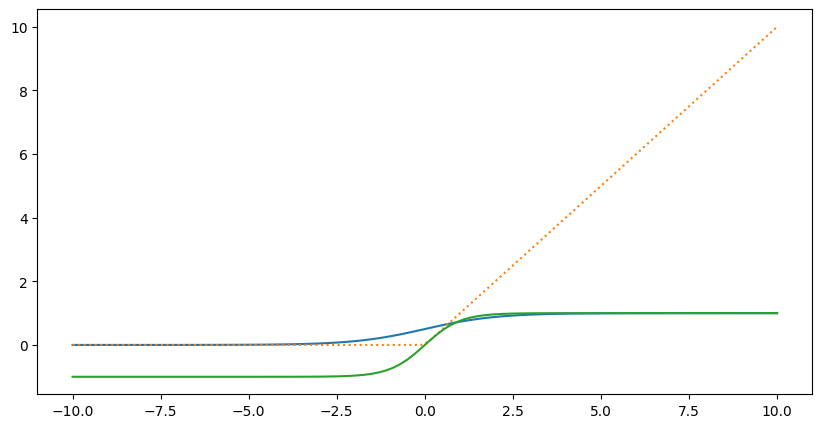

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x,y_sigmoid,label='sigmoid',linestyle='-')
plt.plot(x,y_relu,label='relu',linestyle='dotted')
plt.plot(x,y_tanh,label='tanh',linestyle='solid')

<ipython-input-32-70aa2b82fd9b>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


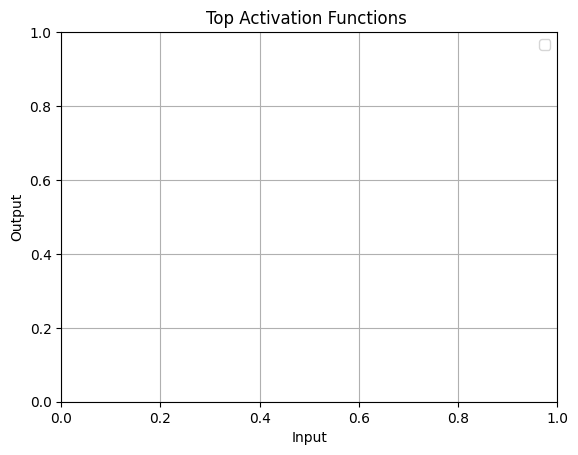

In [ ]:
plt.xlabel('Input')
plt.ylabel('Output')
plt.title("Top Activation Functions ")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Stop words

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Function to remove stop words
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  filtered_text = [word for word in words if word.lower()not in stop_words ]
  return ' '.join(filtered_text)


In [ ]:
sample_text = "This is an example sentence demonstrating the removal of stopwords."
filtered_text = remove_stopwords(sample_text)

In [ ]:
print("Original Text:", sample_text)
print("Filtered Text:", filtered_text)

Original Text: This is an example sentence demonstrating the removal of stopwords.
Filtered Text: example sentence demonstrating removal stopwords .


In [ ]:
# Most Frequently Questions

In [ ]:
#Function to preprocess text
def preprocess_text(text):
    if pd.isna(text):
        return ""
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)


In [ ]:
Kisan['cleaned_questions'] = Kisan['questions'].apply(preprocess_text)

In [ ]:
question_counts = Counter(Kisan['cleaned_questions'])
most_frequent_questions = question_counts.most_common(20)


In [ ]:
print("Most Frequently Occurring Questions:")
for question, count in most_frequent_questions:
    print(f"{question}: {count} times")

Most Frequently Occurring Questions:
asking pm kisan samman nidhi yojona: 522 times
query regarding pm kisan: 321 times
asking fertilizer dose: 317 times
asking kisan credit card: 310 times
asking fertilizer dose coconut: 239 times
asking pm kisan maan dhan yojana: 212 times
asking treatment mastitis cow: 176 times
asking fertilizer dose mustard: 175 times
query regarding pmkisan: 157 times
asking treatment diarrhoea cow: 155 times
asking fertilizer dose potato: 140 times
asking pest problem: 121 times
desease: 118 times
asking pm kisan installment: 118 times
asking nutrient management coconut: 117 times
asking kcc loan: 113 times
asking nutrient management: 105 times
new registration: 104 times
asking control blight potato: 100 times
asked carp culture: 96 times


In [ ]:
# word Frequency Analysis